# Sales Prediction
## ( Simple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# importing necsassary laibrary

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
kiran = pd.DataFrame(pd.read_csv("../input/advertising.csv"))
kiran.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
kiran.shape

(200, 4)

In [4]:
kiran.size

800

In [5]:
kiran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
kiran.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [7]:
# Checking Null values
kiran.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

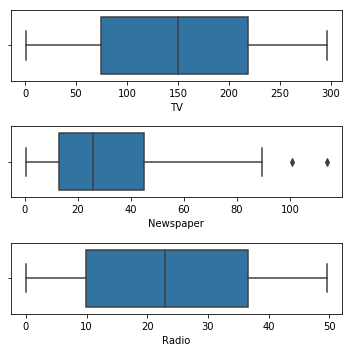

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(kiran['TV'], ax = axs[0])
plt2 = sns.boxplot(kiran['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(kiran['Radio'], ax = axs[2])
plt.tight_layout()

In [9]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

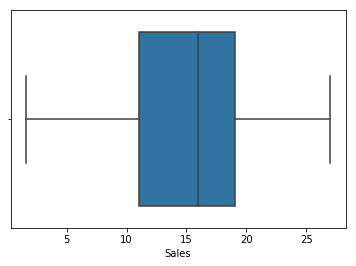

In [10]:
sns.boxplot(kiran['Sales'])
plt.show()

* no outlier in target varible

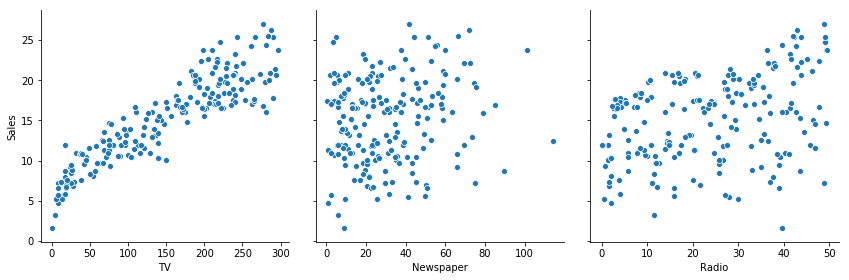

In [11]:
# Let's see how Sales are related with other variables using scatter plot.


sns.pairplot(kiran, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

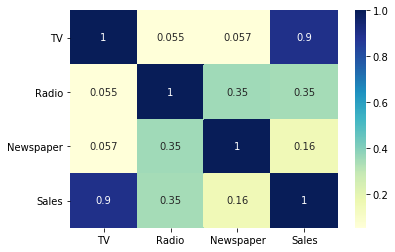

In [12]:
# Let's see the correlation between different variables.
sns.heatmap(kiran.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### from the scatterplot and the heatmap,we can observe that 'sales' and 'tv' have a higher correlation as compared to other.

#### and also see 'sales' and 'newspaper'have a lower correaltion as compared to other..

## Model Building

#### As the "tv" and "sales" have a higher correaltion we will perform the simple linear regression for these variables

### Performing Simple Linear Regression

Equation of linear regression<br>
y=Mx+c

-  $y$ is the response
-  $c$ is the intercept
-  $m$ is the slop
-  $x$ is input features

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

##### assign the features varible 

* 'tv' input varible('x')

* 'sales' ouput/target varible ('y')


In [13]:
x = kiran['TV']
y = kiran['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=1000)

In [15]:
# Let's now take a look at the train dataset

x_train.head()

44      25.1
101    296.4
25     262.9
3      151.5
68     237.4
Name: TV, dtype: float64

In [16]:
y_train.head()

44      8.5
101    23.8
25     17.0
3      16.5
68     18.9
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [17]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [18]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [19]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.888784
TV       0.056939
dtype: float64

In [20]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     603.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.24e-52
Time:                        06:53:00   Log-Likelihood:                -316.45
No. Observations:                 140   AIC:                             636.9
Df Residuals:                     138   BIC:                             642.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8888      0.403     17.087      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

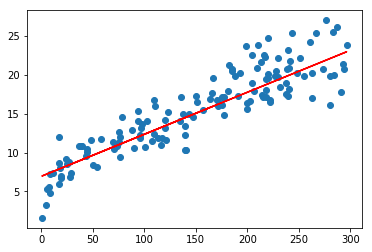

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [22]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

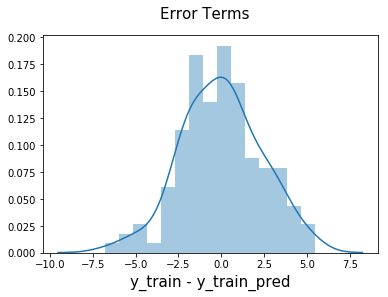

In [23]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

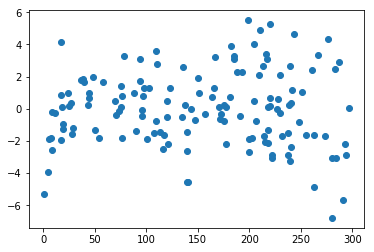

In [24]:
plt.scatter(x_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [25]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [26]:
y_pred.head()

118    14.046013
70     18.225333
163    16.198306
161    11.768454
73     14.256687
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [28]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.224281763448297

###### Checking the R-squared on the test set

In [29]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7939174796416559

##### Visualizing the fit on the test set

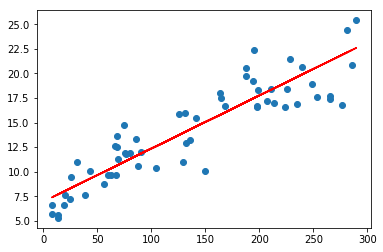

In [30]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()